
I am going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation
    
## Problem Definition

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## Data

The original data came from the Cleaveland data from the UCI Machin Learning repositiory.
https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version of it avalable on Kaggle.

## Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we will pursue the project.

## Features

This is where I will get different information about each of the features in your data.

** creat data dictionary **


1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
        serum = LDL + HDL + .2 * triglycerides
        above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
        0: Nothing to note
        1: ST-T Wave abnormality
            can range from mild symptoms to severe problems
            signals non-normal heart beat
        2: Possible or definite left ventricular hypertrophy
            Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

11. slope - the slope of the peak exercise ST segment
        0: Upsloping: better heart rate with excercise (uncommon)
        1: Flatsloping: minimal change (typical healthy heart)
        2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
        colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots)
13. thal - thalium stress result
        1,3: normal
        6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)



## Preparing the tools:

I am going to use NumPy, Matplotlib and pandas for data analysis and manipulation.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## I want my plots appear inside the notebook:

%matplotlib inline  

## Models from Scikit-Learn:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


## Model Evaluations:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [11]:
df = pd.read_csv ("heart-disease.csv")
df.shape #(rows, colomns)

(303, 14)

## Data Exploration (Exploratory data analysis or EDA)

1. What question(s)?
2. Different data types?
3. Missing data?
4. outliers?
5. How can I add, change or remove features to get more out of my data?


In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [15]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

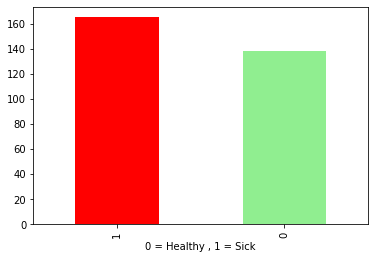

In [48]:
df["target"].value_counts().plot(kind="bar", color=["red", "lightgreen"])
plt.xlabel ("0 = Healthy , 1 = Sick");

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [20]:
## Missing data?

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [23]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [24]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

# Different kind of chest pain and heart disease
cp - chest pain type

    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease

In [39]:
pd.crosstab(df.cp , df.target)


target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


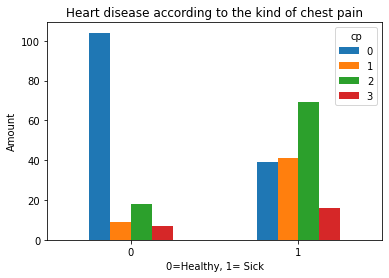

In [47]:
pd.crosstab (df.target , df.cp ).plot (kind = "bar")

plt.title("Heart disease according to the kind of chest pain")
plt.xlabel ("0=Healthy, 1= Sick")
plt.ylabel ("Amount")
plt.xticks (rotation=0);


In [26]:
# sex and heart disease


pd.crosstab(df.sex , df.target)



target,0,1
sex,,
0,24,72
1,114,93


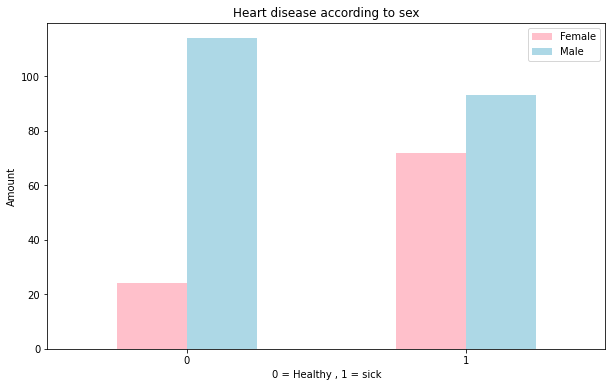

In [40]:
pd.crosstab (df.target , df.sex).plot (kind="bar" , color= ["pink" , "lightblue"] , figsize = (10 , 6))

plt.title ( "Heart disease according to sex")
plt.xlabel ( "0 = Healthy , 1 = sick")
plt.ylabel ("Amount")
plt.legend (["Female" , "Male"])
plt.xticks (rotation=0);


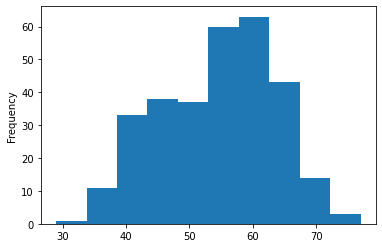

In [36]:
## Check the distribution of age with histogram

df.age.plot.hist();

## Age vs. Max Heart Rate for Heart Disease

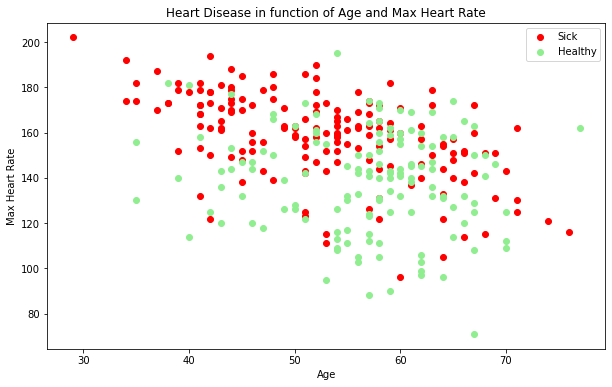

In [56]:
plt.figure(figsize=(10,6))

# scatter with positive examples

plt.scatter(df.age[df.target ==1] , df.thalach[df.target ==1] , color = "red")

# scatter with negative exmples

plt.scatter (df.age [df.target ==0] , df.thalach [df.target ==0] , color= "lightgreen")



plt.title ("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel ("Age")
plt.ylabel ("Max Heart Rate")
plt.legend ([ "Sick" , "Healthy" ]);




## Make correlation matrix

In [57]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


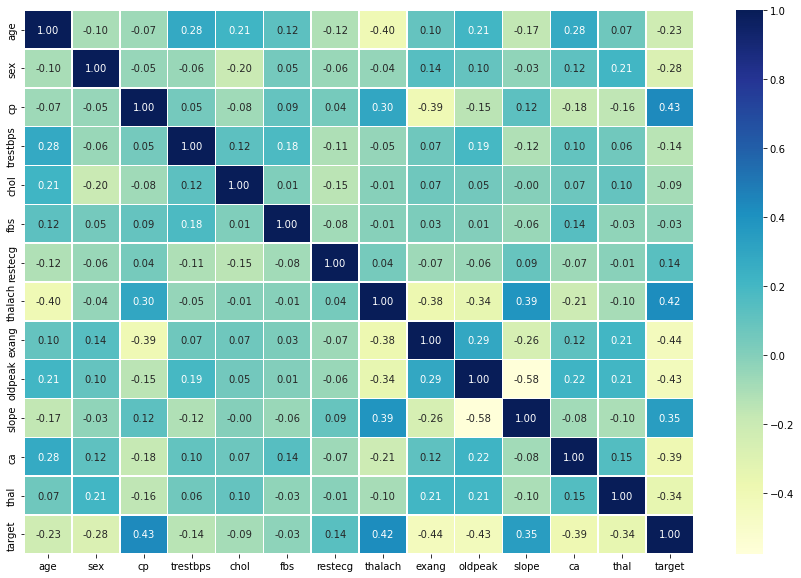

In [58]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

# Modelling

In [112]:
# Split data into x and y

X = df.drop("target" , axis=1)

y= df.target

In [61]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [113]:
# Split data into train and test

np.random.seed (42)

X_train, X_test, y_train, y_test = train_test_split (X , y , test_size = .02)

In [97]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2
205,52,1,0,128,255,0,1,161,1,0.0,2,1,3
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2


In [98]:
y_train.head()

108    1
205    0
44     1
40     1
234    0
Name: target, dtype: int64

## Now I am trying three different machine learning modells:

1.Logistic Regression

2.K-Nearest Neighbours Classifier

3.Random Forest Classifier

In [116]:
models = {"Logistic Regression": LogisticRegression(max_iter=3000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models

def fit_score(models, X_train, X_test, y_train, y_test):
  
    np.random.seed(42)
    
    model_scores = {}
   
    for name, model in models.items():
    
   
        model.fit(X_train, y_train)
       
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [117]:
model_scores = fit_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.8571428571428571,
 'KNN': 0.5714285714285714,
 'Random Forest': 0.7142857142857143}

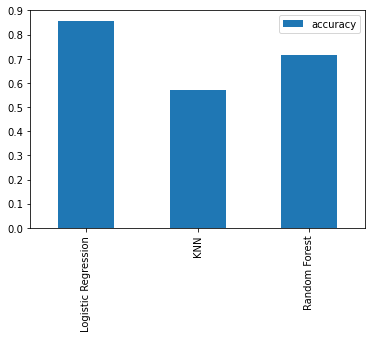

In [118]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now I look at the following:

    Hypyerparameter tuning
    Feature importance
    Confusion matrix
    Cross-validation
    Precision
    Recall
    F1 score
    Classification report
    ROC curve
    Area under the curve (AUC)


# Hyperparameter tuning 

### Tune KNN by hand

In [130]:
# tune KNN

train_scores = []
test_scores = []

neighbors = range(1, 21)


knn = KNeighborsClassifier()


for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    
    test_scores.append(knn.score(X_test, y_test))

In [131]:
train_scores

[1.0,
 0.8141891891891891,
 0.7567567567567568,
 0.7668918918918919,
 0.7635135135135135,
 0.7668918918918919,
 0.75,
 0.7432432432432432,
 0.7466216216216216,
 0.722972972972973,
 0.7297297297297297,
 0.7128378378378378,
 0.6993243243243243,
 0.7162162162162162,
 0.6959459459459459,
 0.7027027027027027,
 0.7027027027027027,
 0.6925675675675675,
 0.6959459459459459,
 0.6858108108108109]

In [140]:
test_scores


[0.7142857142857143,
 0.7142857142857143,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.42857142857142855,
 0.42857142857142855,
 0.5714285714285714,
 0.7142857142857143,
 0.5714285714285714,
 0.7142857142857143,
 0.5714285714285714,
 0.8571428571428571,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143]

Maximum KNN score on the test data: 85.71%


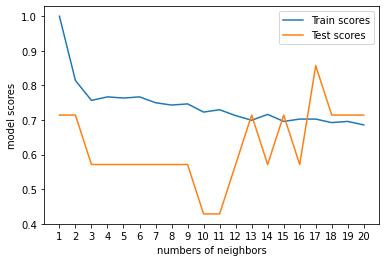

In [141]:
plt.plot (neighbors,train_scores, label = "Train scores" )
plt.plot (neighbors, test_scores, label = "Test scores")

plt.xticks(np.arange(1, 21, 1))

plt.legend()
plt.xlabel("numbers of neighbors")
plt.ylabel("model scores")

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

# Hyperparameter tuning with RandomizedSearchCV

In [142]:
# Create a hyperparameter grid for LogisticRegression

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}


# Create a hyperparameter grid for RandomForestClassifier

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

### Tune LogisticRegression

In [143]:
np.random.seed(42)


rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)



rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [144]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [145]:
rs_log_reg.score(X_test, y_test)

0.8571428571428571

### Tune RandomForestClassifier

In [146]:
np.random.seed(42)


rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)



rs_rf.fit(X_train, y_train)                                   

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [148]:
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 12,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [149]:
rs_rf.score (X_test , y_test)

0.8571428571428571

In [150]:
# compare with original scores 

model_scores

{'Logistic Regression': 0.8571428571428571,
 'KNN': 0.5714285714285714,
 'Random Forest': 0.7142857142857143}

# Hyperparameter Tuning with GridSearchCV

In [153]:
# Different hyperparameters for the LogisticRegression model

log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}


# Setup grid hyperparameter search for LogisticRegression

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)


# Fit grid hyperparameter search model


gs_log_reg.fit(X_train, y_train);


Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [154]:
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [155]:
gs_log_reg.score(X_test, y_test)

0.8571428571428571


# Evaluting our tuned machine learning classifier, beyond accuracy

    ROC curve and AUC score
    
    Confusion matrix
    
    Classification report
    
    Precision
    
    Recall
    
    F1-score


In [156]:
# Make predictions with tuned model

y_preds = gs_log_reg.predict(X_test)

In [157]:
y_preds

array([0, 1, 1, 0, 1, 1, 1])

In [158]:
y_test

179    0
228    0
111    1
246    0
60     1
9      1
119    1
Name: target, dtype: int64

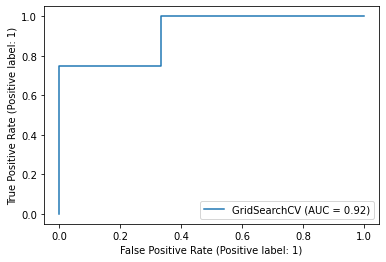

In [159]:
# Plot ROC curve and calculate and calculate AUC metric

plot_roc_curve(gs_log_reg, X_test, y_test)

In [160]:
# Confusion matrix

print(confusion_matrix(y_test, y_preds))

[[2 1]
 [0 4]]


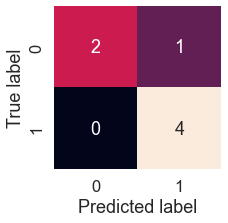

In [162]:

sns.set(font_scale=1.5)


def plot_conf_mat(y_test, y_preds):

    
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
 
plot_conf_mat(y_test, y_preds)



In [163]:

print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.80      1.00      0.89         4

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7



# Calculate evaluation metrics using cross-validation

In [164]:
# Check best hyperparameters

gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [168]:
# Create a new classifier with best parameters

clf = LogisticRegression(C=0.38566204211634725,
                         solver="liblinear")

In [170]:
# Cross-validated accuracy

cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.8852459 , 0.86885246, 0.86666667, 0.75      ])

In [171]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8380874316939891

In [172]:
# Cross-validated precision

cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision


0.8154667272314331

In [173]:

# Cross-validated recall

cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall


0.9151515151515153

In [174]:
# Cross-validated f1-score

cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1


0.8614850462777628

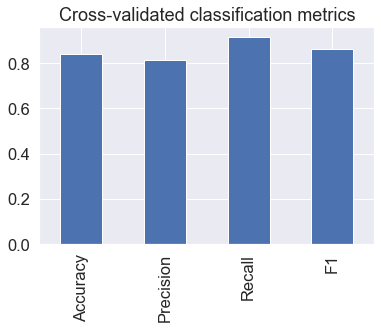

In [175]:
# Visualize cross-validated metrics

cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);



# Feature Importance

> which features contributed most to the outcomes of the model and how did they contribute?

In [178]:

# Fit an instance of LogisticRegression

clf = LogisticRegression(C=0.38566204211634725,
                         solver="liblinear")

clf.fit(X_train, y_train);



In [179]:
# Check coef_

clf.coef_


array([[ 0.00667794, -1.05416496,  0.785209  , -0.01306232, -0.00207848,
        -0.08525488,  0.3752637 ,  0.02688368, -0.69363495, -0.53481257,
         0.39826028, -0.6856741 , -0.725626  ]])

In [180]:
# Match coef's of features to columns

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.006677942408687253,
 'sex': -1.054164958581584,
 'cp': 0.7852090004015421,
 'trestbps': -0.013062319454997254,
 'chol': -0.002078479995528105,
 'fbs': -0.08525488413608819,
 'restecg': 0.37526370113150187,
 'thalach': 0.0268836769400083,
 'exang': -0.6936349515695789,
 'oldpeak': -0.5348125723660873,
 'slope': 0.39826027872042113,
 'ca': -0.6856740968575021,
 'thal': -0.7256260035113989}

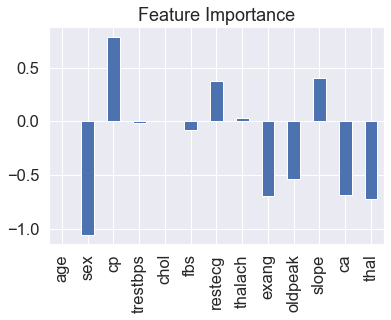

In [181]:
# Visualize feature importance

feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [182]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [183]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16
